# Predict Loan Eligibility for Dream Housing Finance company

## 1. Problem Statement and Hypothesis Generation 

### 1.1 Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

### 1.2 Hypothesis

- Applicants with high income should have higher chances of loan approval.
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

## 2. Importing Libraries and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the training dataset
train_df = pd.read_csv("train.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 3. Understanding the Dataset

In [3]:
train_df.shape

(614, 13)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
print(train_df["Dependents"].unique())
train_df.columns

['0' '1' '2' '3+' nan]


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Dataset Information:
1. **Loan_ID:** Unique Loan ID for each applicant(numerical)
2. **Gender:** Male/Female (categorical)
3. **Married:** Applicant maritial status (Yes/No) (categorical)
4. **Dependents:** Number of dependents[0, 1, 2, 3+] (numerical)
5. **Education:** Applicant Education (Graduate/Not Graduate) (categorical)
6. **Self_Employed:** Self employed or not (Yes/No) (categorical)
7. **ApplicantIncome:** Applicant income (numerical)
8. **CoapplicantIncome:** Coapplicant income (numerical)
9. **LoanAmount:** Loan amount in thousands (numerical)
10. **Loan_Amount_Term:** Term of loan in months (numerical)
11. **Credit_History:** Credit history meets guidelines (1/0) (categorical)
12. **Property_Area:** Urban/Semi Urban/Rural (categorical)
13. **Loan_Status:** Loan approved (Y/N) (categorical) (Target Variable)

## 4. Exploratory Data Analysis

### 4.1 Univariate Analysis

In [8]:
cat_columns = train_df.select_dtypes(include=["object"]).columns.tolist()[1:]
cat_columns.append("Credit_History")
for column in cat_columns:
    print(
        pd.DataFrame(
            [
                train_df[column].value_counts(),
                train_df[column].value_counts(normalize=True),
            ]
        ),
        "\n\n",
    )

Gender            Male      Female
count       489.000000  112.000000
proportion    0.813644    0.186356 


Married            Yes          No
count       398.000000  213.000000
proportion    0.651391    0.348609 


Dependents          0           1           2         3+
count       345.00000  102.000000  101.000000  51.000000
proportion    0.57596    0.170284    0.168614   0.085142 


Education     Graduate  Not Graduate
count       480.000000    134.000000
proportion    0.781759      0.218241 


Self_Employed          No        Yes
count          500.000000  82.000000
proportion       0.859107   0.140893 


Property_Area   Semiurban      Urban       Rural
count          233.000000  202.00000  179.000000
proportion       0.379479    0.32899    0.291531 


Loan_Status           Y           N
count        422.000000  192.000000
proportion     0.687296    0.312704 


Credit_History         1.0        0.0
count           475.000000  89.000000
proportion        0.842199   0.157801 




In [9]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [10]:
import matplotlib.patheffects as pe


custom_plt_style_black = {
    "axes.facecolor": "black",
    "figure.facecolor": "black",
    "axes.labelcolor": "white",
    "axes.titlecolor": "white",
    "axes.titleweight": "bold",
    "text.color": "white",
    "font.size": 12,
    "font.weight": "bold",
    "path.effects": [pe.withStroke(linewidth=3, foreground="black")],
}

style_textprops = {
    "color": "white",
    "fontsize": 12,
    "fontweight": "bold",
    "path_effects": [pe.withStroke(linewidth=3, foreground="black")],
}

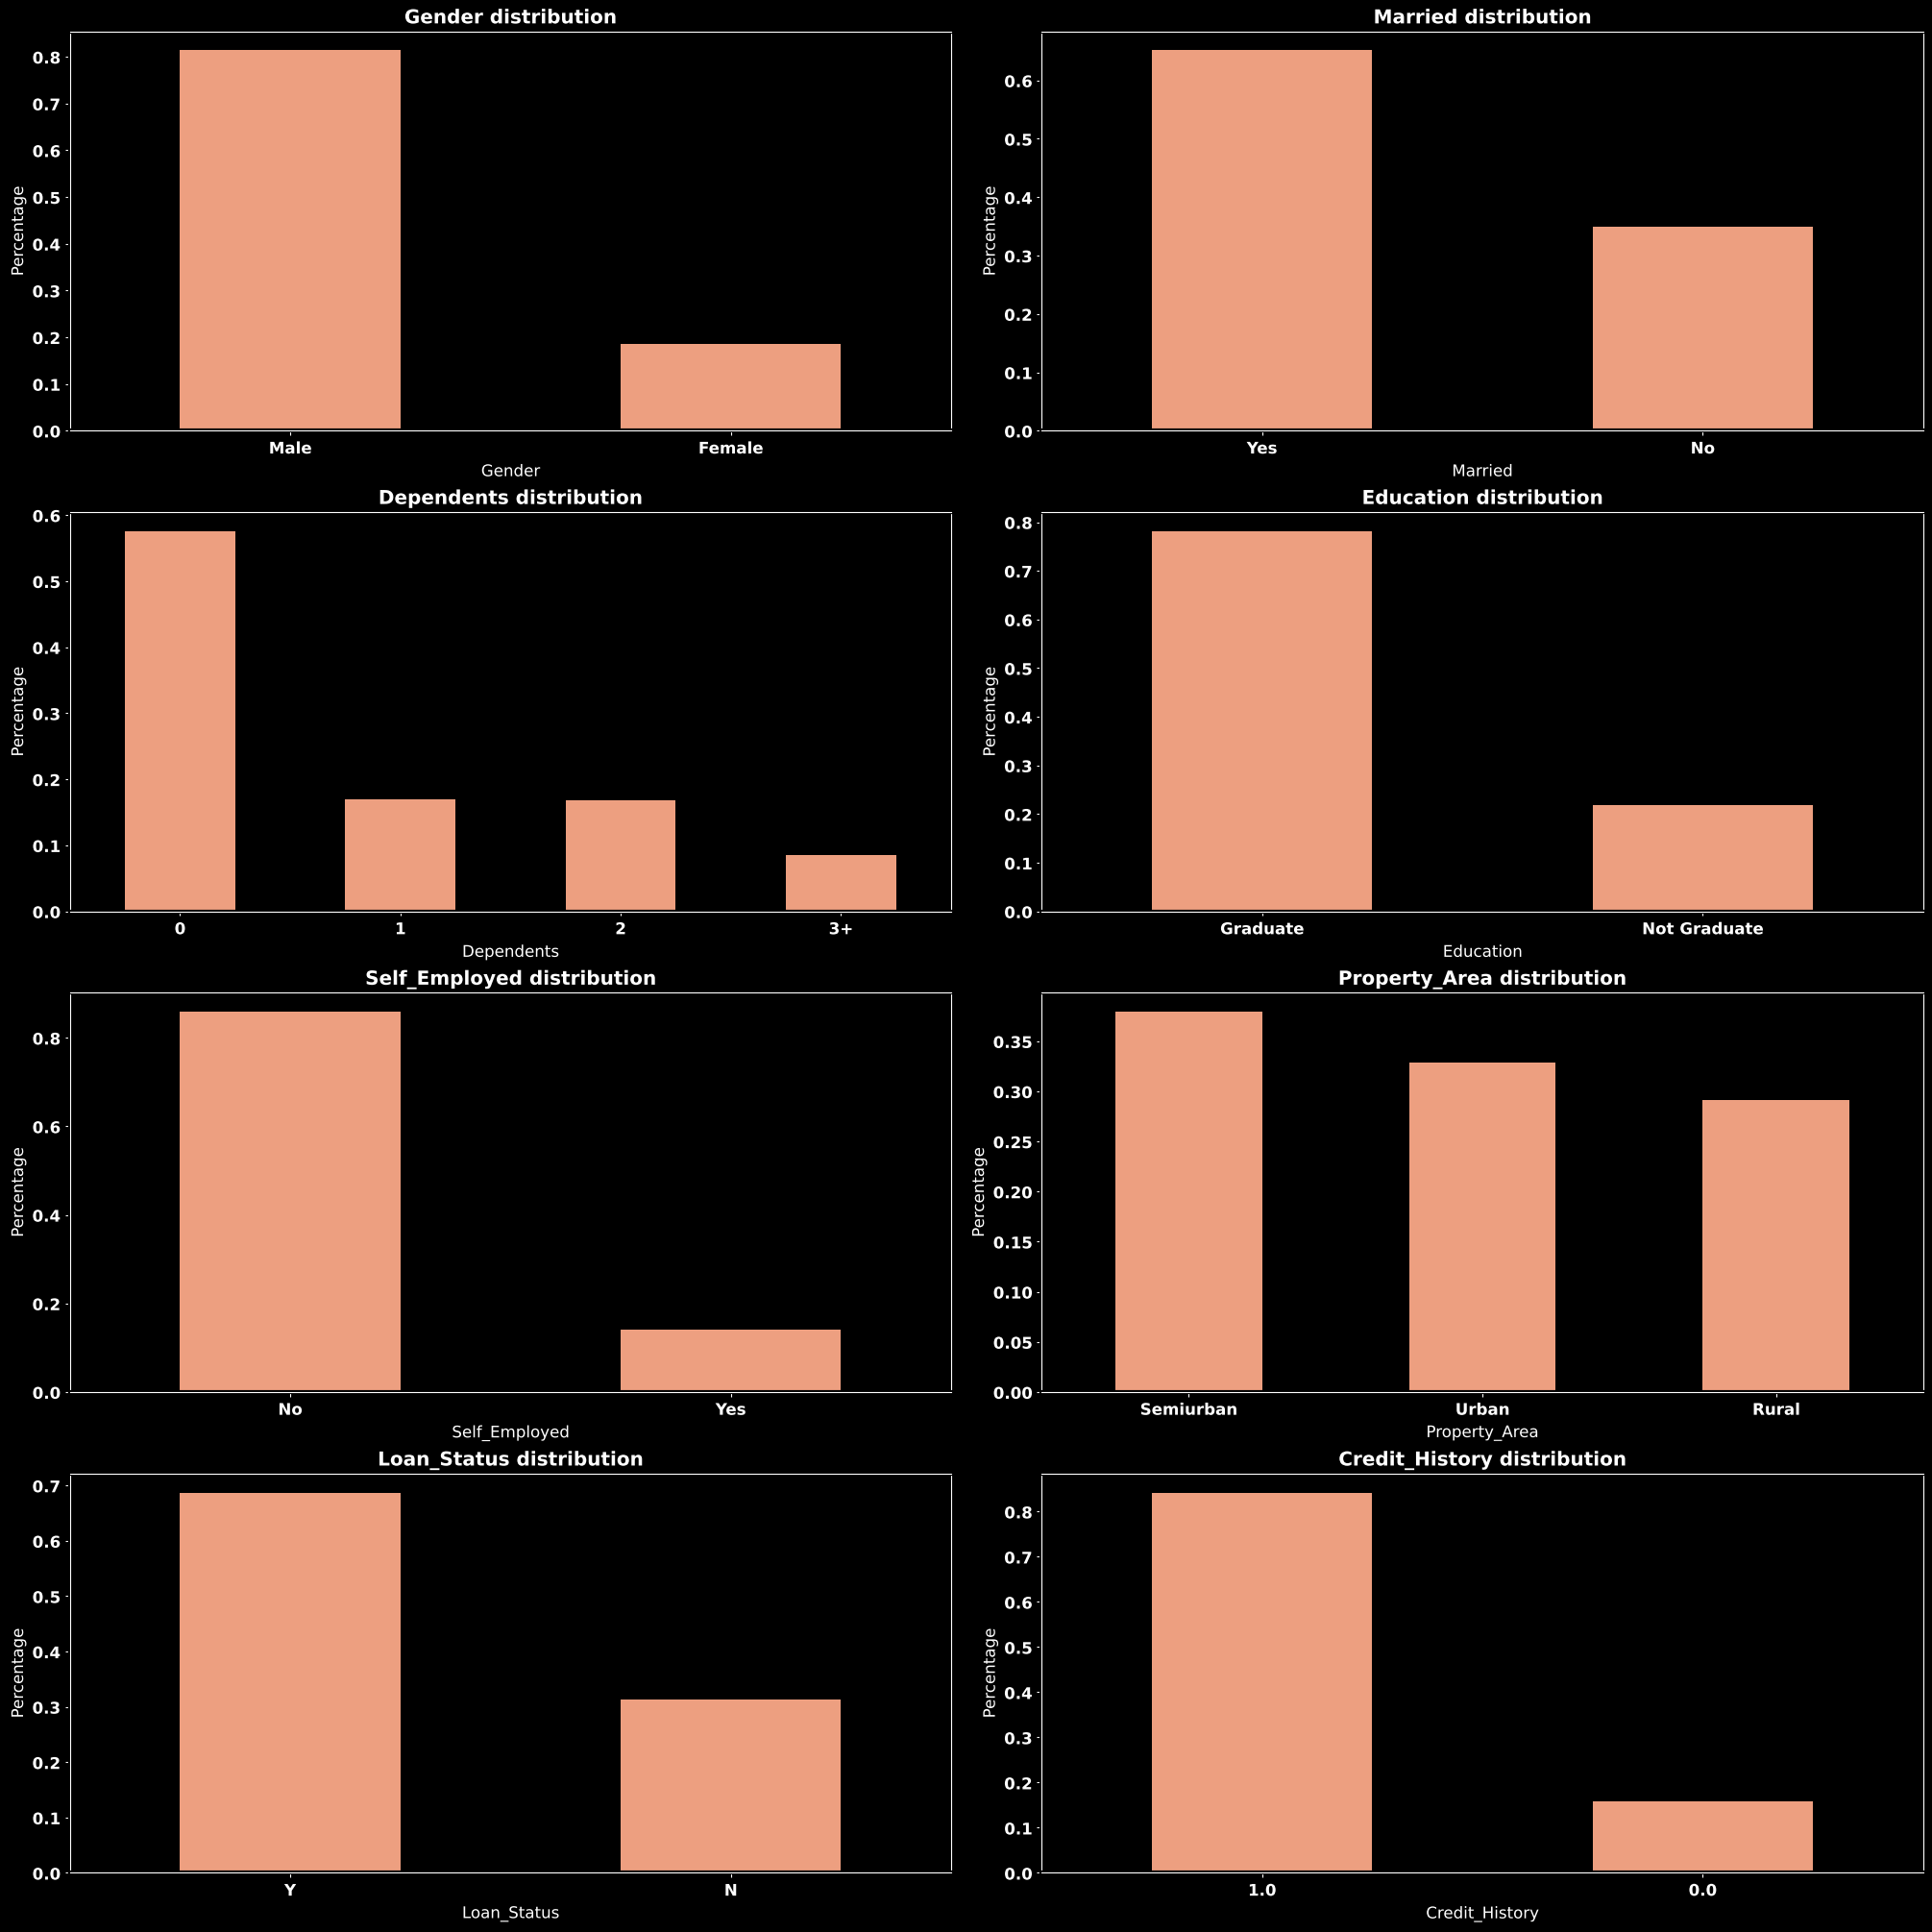

In [11]:
import math

n_cols = 2
n_rows = math.ceil(len(cat_columns) / n_cols)
plt.rcParams.update(custom_plt_style_black)
plt.style.use("dark_background")
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(n_cols * 10, n_rows * 5), constrained_layout=True
)

axes = axes.flatten()

for i, column in enumerate(cat_columns):
    train_df[column].value_counts(normalize=True).plot(
        kind="bar", ax=axes[i], color="#ed9f80"
    )

    axes[i].set_title(f"{column} distribution")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Percentage")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)


for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.show()

- About 422 (68.73%) out-off 614 of the applicants were approved for the loan.
- 80% of the applicants are male.
- 65% of the applicants are married.
- 78% of the applicants are graduates.
- 15% of the applicants are self-employed.
- 85% of the applicants have a credit history that meets the guidelines.
- 65% of the applicants are from semi-urban areas.

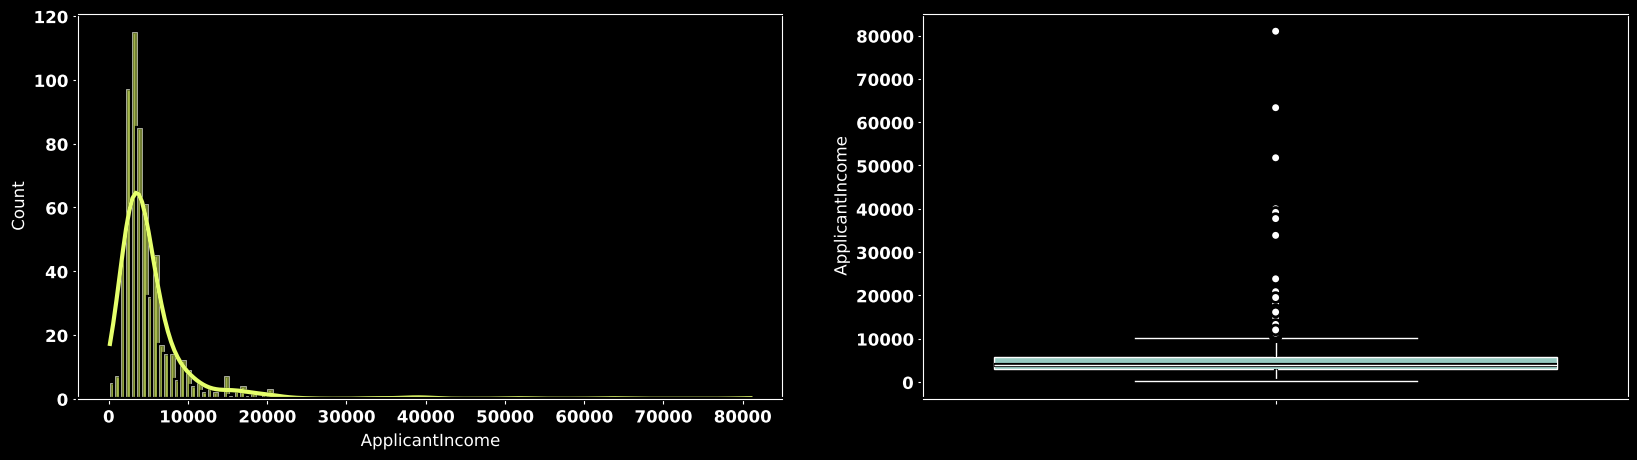

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(
    train_df["ApplicantIncome"],
    kde=True,
    ax=axes[0],
    color="#e5ff6b",
    line_kws={"linewidth": 3},
)
sns.boxplot(
    y=train_df["ApplicantIncome"],
    ax=axes[1],
    linecolor="white",
    flierprops=dict(
        markerfacecolor="white", markeredgewidth=1, markeredgecolor="black"
    ),
)
plt.show()

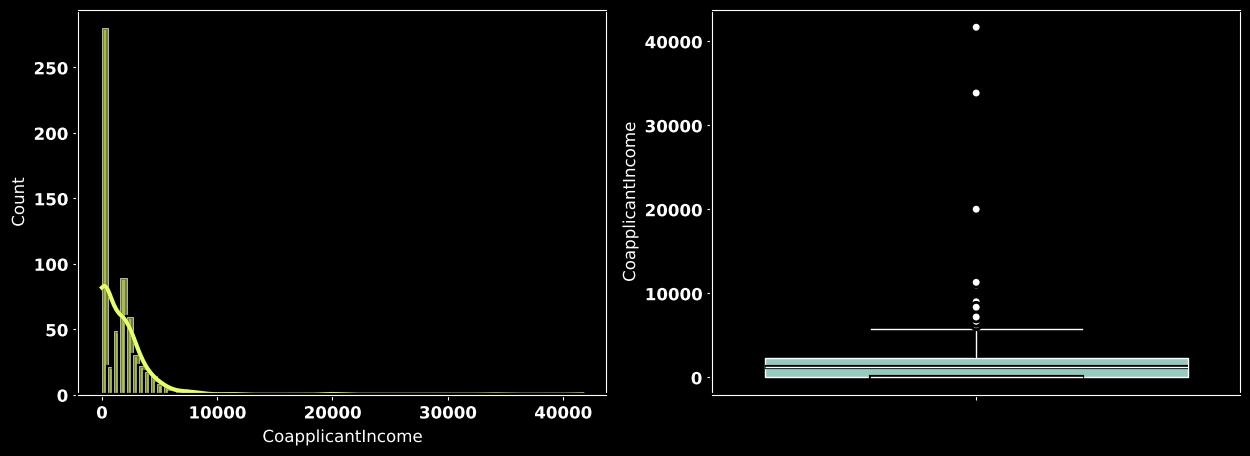

In [13]:
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(
    train_df["CoapplicantIncome"], kde=True, color="#e5ff6b", line_kws={"linewidth": 3}
)
plt.subplot(122)
sns.boxplot(
    y=train_df["CoapplicantIncome"],
    linecolor="white",
    flierprops=dict(
        markerfacecolor="white", markeredgewidth=1, markeredgecolor="black"
    ),
)
plt.show()

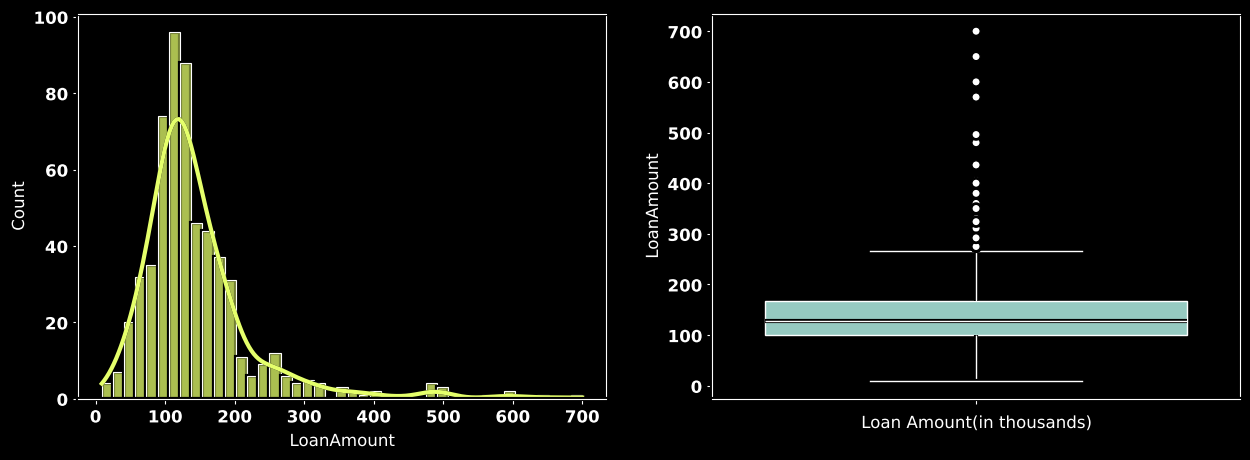

In [14]:
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(
    train_df["LoanAmount"], kde=True, color="#e5ff6b", line_kws={"linewidth": 3}
)
plt.subplot(122)
sns.boxplot(
    y=train_df["LoanAmount"],
    linecolor="white",
    flierprops=dict(
        markerfacecolor="white", markeredgewidth=1, markeredgecolor="black"
    ),
)
plt.xlabel("Loan Amount(in thousands)")
plt.show()

- Majority of applicants income is between 0 to 10,000.
- Majority of co-applicants income is between 0 to 5,000.
- Majority of loan amount is between 100 to 200.
- Outliers are present in the loan amount term.

### 4.2 Bivariate Analysis

Here we are trying to test the [hypothesis](#12-hypothesis) that we generated earlier.

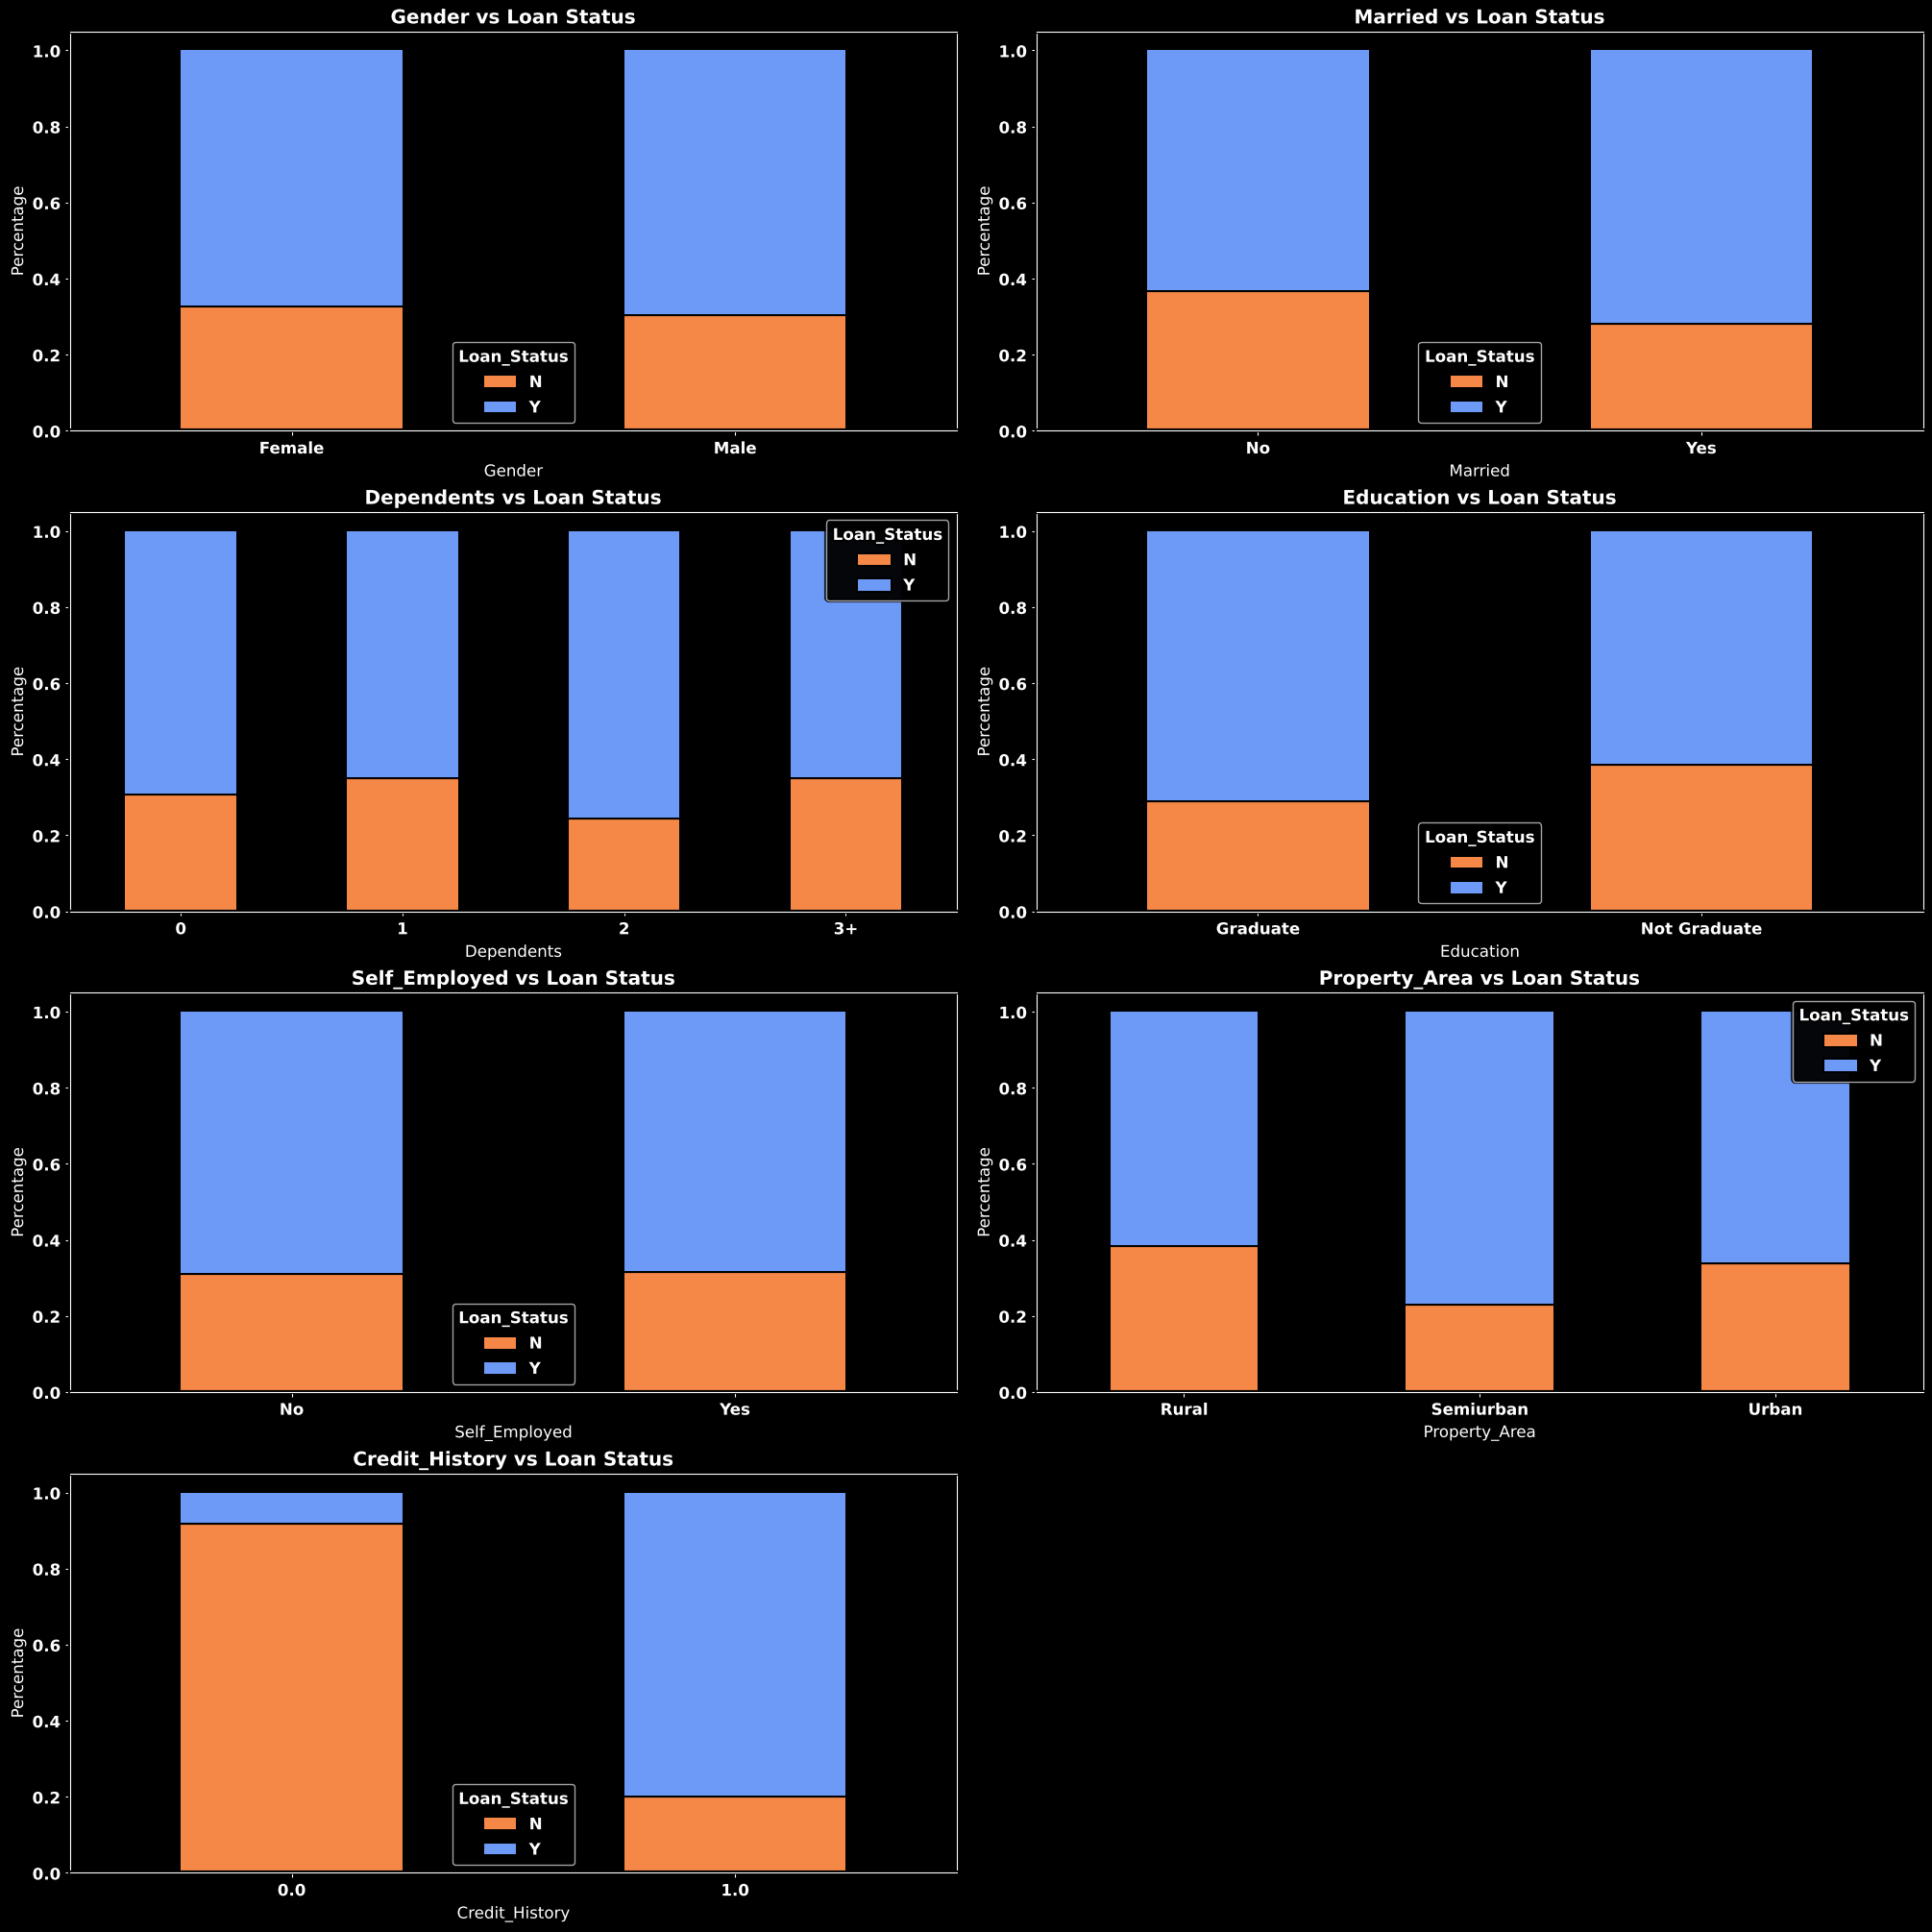

In [15]:
n_cols = 2
cat_columns.remove("Loan_Status")
n_rows = math.ceil(len(cat_columns) / n_cols)
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(n_cols * 10, n_rows * 5), constrained_layout=True
)
axes = axes.flatten()

for i, column in enumerate(cat_columns):
    cm = pd.crosstab(train_df[column], train_df["Loan_Status"], normalize="index")
    cm.plot(kind="bar", stacked=True, ax=axes[i], color=["#f58747", "#6d99f7"])
    axes[i].set_title(f"{column} vs Loan Status")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Percentage")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.show()

- It can be inferred that the Male and Female applicants have almost equal chances of loan approval.
- Married applicants have a bit higher chances of loan approval.
- Applicants with 1 or 3+ dependents have higher chances of loan approval.
- Graduates have higher chances of loan approval.
- There is no significant impact of self-employed on loan approval.
- Applicants with credit history meeting guidelines have higher chances of loan approval (confirming our [hypothesis](#12-hypothesis) point 2).
- Applicants from semi-urban areas have higher chances of loan approval.

<Axes: xlabel='Loan_Status'>

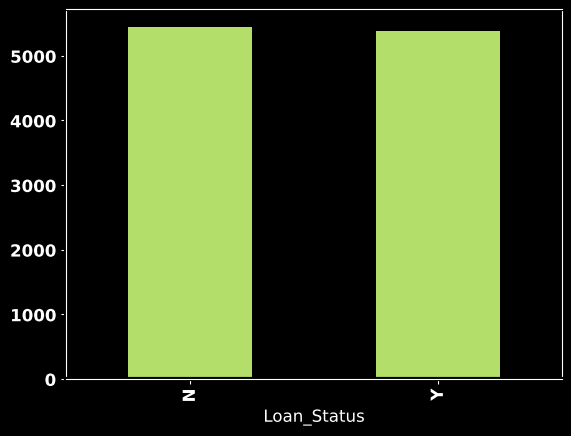

In [16]:
train_df.groupby("Loan_Status")["ApplicantIncome"].mean().plot(
    kind="bar", color="#b3de69"
)

In [17]:
train_df["ApplicantIncome"].mean()

5403.459283387622

Let's divide the income in 4 categories:
- Low: 0-2500
- Average: 2500-4000
- High: 4000-6000
- Very High: 6000+

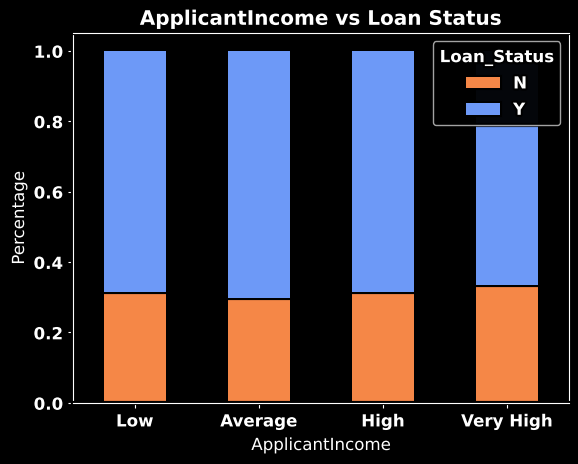

In [18]:
train_df["Income_bin"] = pd.cut(
    train_df["ApplicantIncome"],
    bins=[0, 2500, 4000, 6000, 81000],
    labels=["Low", "Average", "High", "Very High"],
)
income_bin = pd.crosstab(
    train_df["Income_bin"], train_df["Loan_Status"], normalize="index"
)
income_bin.plot(kind="bar", stacked=True, color=["#f58747", "#6d99f7"])
plt.title("ApplicantIncome vs Loan Status")
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

This plot shows that the applicant's income has no effect on loan approval which contradicts our [hypothesis](#12-hypothesis) point 1. Applicants with high income do not have higher chances of loan approval.


Let's check for the correlation between coapplicant income and loan amount.

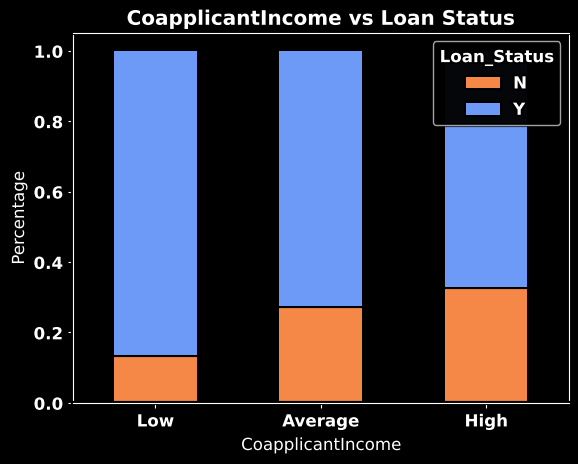

In [19]:
train_df["CoapplicantIncome_bin"] = pd.cut(
    train_df["CoapplicantIncome"],
    bins=[0, 1000, 3000, 42000],
    labels=["Low", "Average", "High"],
)
coapplicant_income_bin = pd.crosstab(
    train_df["CoapplicantIncome_bin"], train_df["Loan_Status"], normalize="index"
)
coapplicant_income_bin.plot(kind="bar", stacked=True, color=["#f58747", "#6d99f7"])
plt.title("CoapplicantIncome vs Loan Status")
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

The graph shows that the coapplicant wiith lower income have taken higher loan amount. But there are some irregularities in the data such as most of the applicants have no coapplicant and it's denoted by 0.

To fix this let's create a new feature called Total Income which is the sum of Applicant Income and Coapplicant Income.

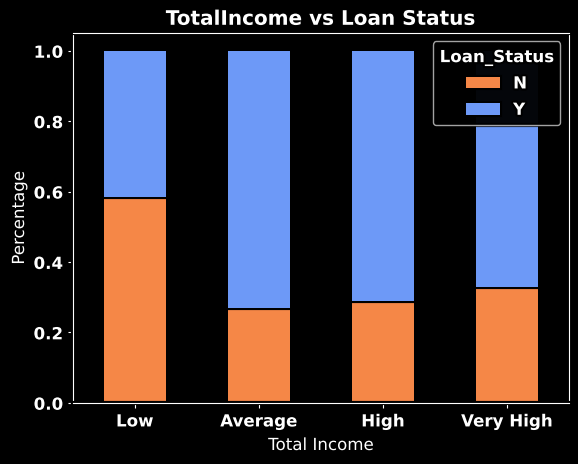

In [20]:
train_df["TotalIncome"] = train_df["ApplicantIncome"] + train_df["CoapplicantIncome"]
train_df["TotalIncome_bin"] = pd.cut(
    train_df["TotalIncome"],
    bins=[0, 2500, 4000, 6000, 81000],
    labels=["Low", "Average", "High", "Very High"],
)
total_income_bin = pd.crosstab(
    train_df["TotalIncome_bin"], train_df["Loan_Status"], normalize="index"
)
total_income_bin.plot(kind="bar", stacked=True, color=["#f58747", "#6d99f7"])
plt.title("TotalIncome vs Loan Status")
plt.xlabel("Total Income")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

The above graph is now properly able to show that the applicants with low total income has less chances of loan approval confirming our [hypothesis](#12-hypothesis) point 1.

Let's visualize the relation between loan amount and loan approval.

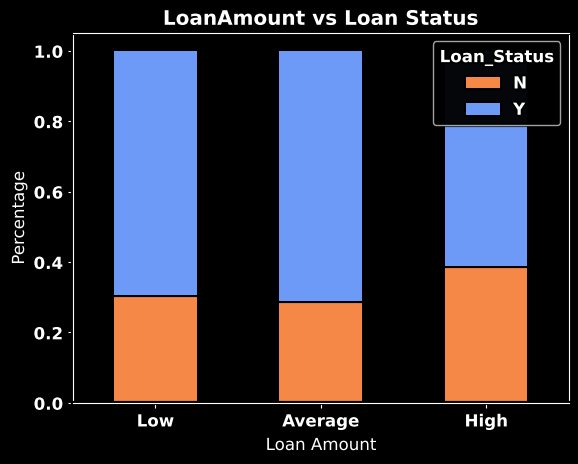

In [21]:
train_df["LoanAmount_bin"] = pd.cut(
    train_df["LoanAmount"], bins=[0, 100, 200, 700], labels=["Low", "Average", "High"]
)
loan_amount_bin = pd.crosstab(
    train_df["LoanAmount_bin"], train_df["Loan_Status"], normalize="index"
)
loan_amount_bin.plot(kind="bar", stacked=True, color=["#f58747", "#6d99f7"])
plt.title("LoanAmount vs Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

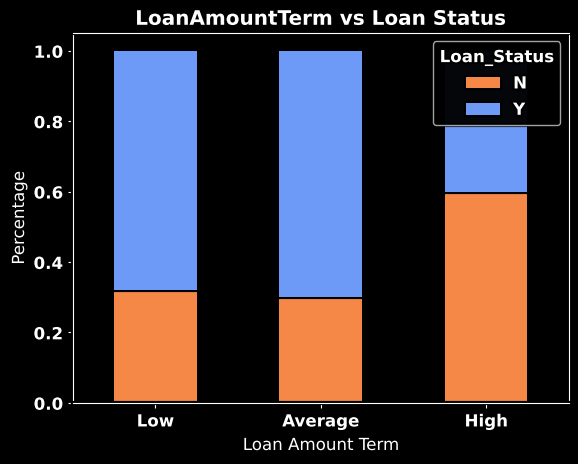

In [22]:
train_df["LoanAmountTerm_bin"] = pd.cut(
    train_df["Loan_Amount_Term"],
    bins=[0, 200, 400, 700],
    labels=["Low", "Average", "High"],
)

loan_amount_term_bin = pd.crosstab(
    train_df["LoanAmountTerm_bin"], train_df["Loan_Status"], normalize="index"
)

loan_amount_term_bin.plot(kind="bar", stacked=True, color=["#f58747", "#6d99f7"])
plt.title("LoanAmountTerm vs Loan Status")
plt.xlabel("Loan Amount Term")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

It can be seen that lower the loan amount, higher the chances of loan approval confirming our [hypothesis](#12-hypothesis) point 3.

In [23]:
# Dropping the created bins
train_df = train_df.drop(
    [
        "Income_bin",
        "CoapplicantIncome_bin",
        "TotalIncome_bin",
        "LoanAmount_bin",
        "TotalIncome",
        "LoanAmountTerm_bin",
    ],
    axis=1,
)

In [24]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
train_df["Loan_Status"] = train_df["Loan_Status"].replace("N", 0)
train_df["Loan_Status"] = train_df["Loan_Status"].replace("Y", 1)
train_df.head()

C:\Users\Hitesh More\AppData\Local\Temp\ipykernel_8284\3776947773.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Loan_Status"] = train_df["Loan_Status"].replace("Y", 1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## 5. Missing Value and Outlier Treatment

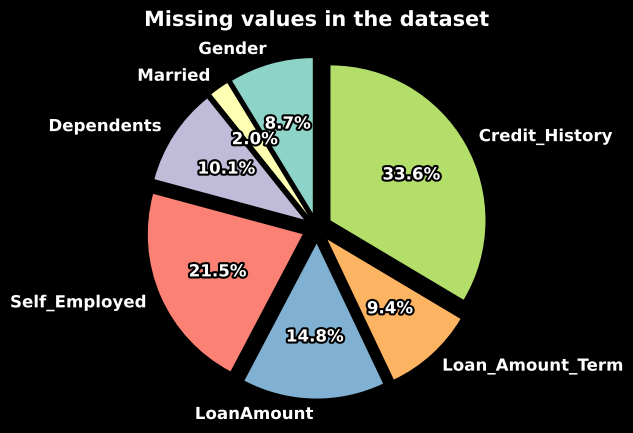

In [26]:
import matplotlib.patheffects as pe

missing = train_df.isnull().sum()
missing = missing[missing > 0]
fig, ax = plt.subplots(figsize=(5, 10))
plt.style.use("dark_background")
textprops = {
    "color": "white",
    "fontsize": 12,
    "fontweight": "bold",
    "path_effects": [pe.withStroke(linewidth=3, foreground="black")],
}
missing.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.1] * len(missing),
    textprops=textprops,
)
fig.patch.set_facecolor("black")
ax.set_facecolor("black")
plt.title(
    "Missing values in the dataset",
    color="white",
    fontsize=15,
    fontweight="bold",
    path_effects=[pe.withStroke(linewidth=3, foreground="black")],
)
plt.show()

There are outlier in the loan amount term, hence it would be better to replace the outliers with the median value.

In [27]:
X = train_df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = train_df["Loan_Status"]

In [28]:
cat_columns = X.select_dtypes(include=["object"]).columns.tolist()

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Imputing missing values
mode_imputer = SimpleImputer(strategy="most_frequent")
median_imputer = SimpleImputer(strategy="median")
missing_mode_columns = [
    "Gender",
    "Married",
    "Dependents",
    "Self_Employed",
    "Credit_History",
    "Loan_Amount_Term",
]

missing_transformer = ColumnTransformer(
    transformers=[
        ("mode_imputer", mode_imputer, missing_mode_columns),
        ("median_imputer", median_imputer, ["LoanAmount"]),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")


def log_transform(x):
    return np.log1p(x)


log_transformer = FunctionTransformer(log_transform)
ohe = OneHotEncoder(sparse_output=False)

data_tranformer = ColumnTransformer(
    transformers=[
        ("ohe", ohe, cat_columns),
        (
            "log_transformer",
            log_transformer,
            ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"],
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

In [30]:
from sklearn.pipeline import Pipeline

data_pipeline = Pipeline(
    [
        ("missing_transformer", missing_transformer),
        ("data_transformer", data_tranformer),
    ]
)

X = data_pipeline.fit_transform(X)
X.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.674197,0.000000,4.859812,1.0,360.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,8.430327,7.319202,4.859812,1.0,360.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.006701,0.000000,4.204693,1.0,360.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.857094,7.765993,4.795791,1.0,360.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.699681,0.000000,4.955827,1.0,360.0


## 6. Model Building

All the categorical variables are converted to numberical and the missing values and outliers are treated. Now we can build the model.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
log_params = {
    "max_iter": [1000, 1500, 2000],
    "C": [0.1, 0.5, 1, 5, 10],
}

log_reg = LogisticRegression()
log_grid = GridSearchCV(log_reg, log_params, cv=5, n_jobs=-1, verbose=1)
log_grid.fit(X_train, y_train)

print(log_grid.best_score_, log_grid.best_params_)
log_grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.7963306534735106 {'C': 0.5, 'max_iter': 1000}


LogisticRegression(C=0.5, max_iter=1000)

In [33]:
log_model = log_grid.best_estimator_
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")

Accuracy Score: 0.8536585365853658
F1 Score: 0.9032258064516129
Precision Score: 0.8316831683168316
Recall Score: 0.9882352941176471


In [34]:
svc_params = {
    "C": [0.1, 0.5, 1, 5, 10],
    "kernel": ["linear", "rbf", "poly"],
}

svc = SVC()
svc_grid = GridSearchCV(svc, svc_params, cv=5, n_jobs=-1, verbose=1)
svc_grid.fit(X_train, y_train)
print(svc_grid.best_score_, svc_grid.best_params_)
svc_grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.7983714698000413 {'C': 0.1, 'kernel': 'linear'}


SVC(C=0.1, kernel='linear')

In [35]:
svc_model = svc_grid.best_estimator_
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")

Accuracy Score: 0.8536585365853658
F1 Score: 0.9032258064516129
Precision Score: 0.8316831683168316
Recall Score: 0.9882352941176471


In [36]:
## Commented out becuase require about 5 mins to run, the best parameters are already found and stored in the next cell
# from sklearn.model_selection import GridSearchCV

# # rfc_params = {
# #   "n_estimators": [50, 100, 200, 300, 400, 500, 1000],
# #   "max_depth": [5, 7, 9, 10, 15, 20],
# # }

# rfc_params = {
#   "n_estimators": [100, 200, 300],
#   "max_depth": [5, 10, 15],
#   "min_samples_split": [2, 5, 10],
#   "min_samples_leaf": [1, 2, 4],
#   "max_features": ["sqrt", "log2"],
#   "criterion": ["gini", "entropy"],
#   "bootstrap": [True, False]
# }


# rfc = RandomForestClassifier()

# best_scores = []
# best_params = []
# for i in range(3):
#   rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, n_jobs=-1, verbose=1)
#   rfc_grid.fit(X_train, y_train)
#   best_scores.append(rfc_grid.best_score_)
#   best_params.append(rfc_grid.best_params_)

# print(f"Average Best Score: {np.mean(best_scores)}")

In [37]:
best_param = {
    "bootstrap": False,
    "criterion": "entropy",
    "max_depth": 5,
    "max_features": "log2",
    "min_samples_leaf": 4,
    "min_samples_split": 2,
    "n_estimators": 100,
}
rfc_model = RandomForestClassifier(**best_param)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")

Accuracy Score: 0.8536585365853658
F1 Score: 0.9032258064516129
Precision Score: 0.8316831683168316
Recall Score: 0.9882352941176471


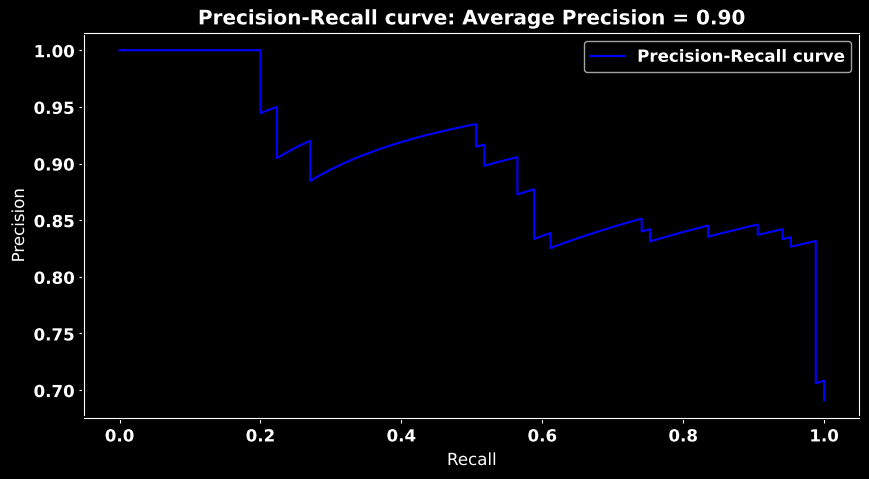

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = rfc_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color="blue", label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall curve: Average Precision = {average_precision:.2f}")
plt.legend()
plt.show()

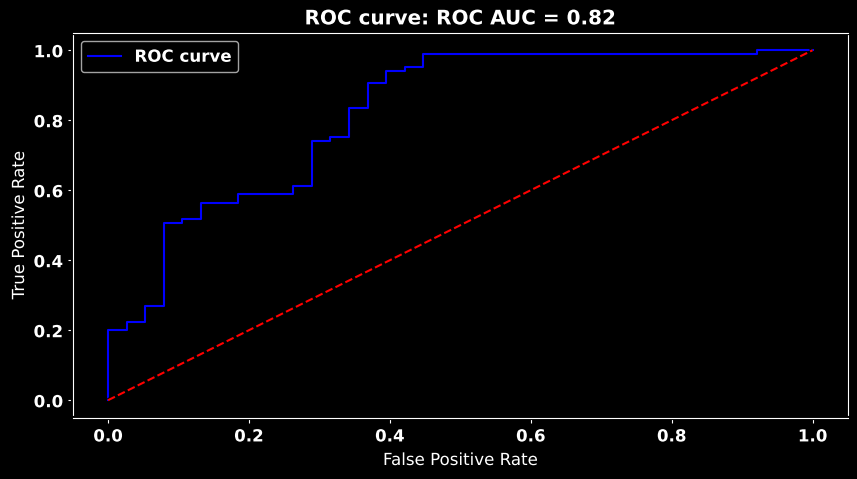

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color="blue", label="ROC curve")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curve: ROC AUC = {roc_auc:.2f}")
plt.legend()
plt.show()

In [40]:
import pickle


with open("../artifacts/data_pipeline.pkl", "wb") as f:
    pickle.dump(data_pipeline, f)

with open("../artifacts/model.pkl", "wb") as f:
    pickle.dump(rfc_model, f)